Dataset de Producciones de Teatro Musical en España (2010–2025)

Este dataset es propio y ha sido construido y diseñado, aplicando conocimiento del sector del teatro musical y recopilando información procedente de fuentes públicas, bases institucionales, notas de prensa, carteleras históricas y páginas oficiales de productoras y teatros.

El objetivo es modelizar una muestra representativa de las producciones de teatro musical estrenadas en España entre 2011 y 2025, con un enfoque analítico orientado a entender patrones de producción, concentración geográfica, dinámicas por productora, duración en cartel y presencia de giras.

El dataset no pretende ser un censo exhaustivo del sector, sino una muestra curada y coherente, estructurada para facilitar análisis exploratorios y la construcción de dashboards y modelos descriptivos. Incluye variables clave como productora, teatro de estreno, sede principal, año de inicio y fin, duración y si la obra realizó gira.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Shape (filas, columnas): (73, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clave_prod        73 non-null     object 
 1   obra              73 non-null     object 
 2   productora        73 non-null     object 
 3   anio_inicio       73 non-null     int64  
 4   anio_fin          61 non-null     float64
 5   teatro            73 non-null     object 
 6   ciudad_principal  73 non-null     object 
 7   gira              73 non-null     object 
 8   fuente_url        73 non-null     object 
 9   activa            73 non-null     bool   
 10  duracion          73 non-null     float64
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 5.9+ KB

Primeras filas:


,clave_prod,obra,productora,anio_inicio,anio_fin,teatro,ciudad_principal,gira,fuente_url,activa,duracion
0,"101 dálmatas, el musical | teatropolis (gran t...","101 Dálmatas, el musical",Teatropolis (Gran Teatro CaixaBank Príncipe Pío),2023,NaN,Gran Teatro CaixaBank Príncipe Pío,Madrid,No,https://www.granteatrocaixabankprincipepio.com/,True,85.0
1,aladdín | stage entertainment | 2023 | 2025.0,Aladdín,Stage Entertainment,2023,2025.0,Teatro Coliseum,Madrid,No,https://www.stage.es/musicales/aladdin/,False,145.0
2,anastasia | stage entertainment | 2018 | 2020.0,Anastasia,Stage Entertainment,2018,2020.0,Teatro Coliseum,Madrid,No,https://www.stage.es/musicales/anastasia/,False,145.0
3,avenue q | teatropolis (gran teatro caixabank ...,Avenue Q,Teatropolis (Gran Teatro CaixaBank Príncipe Pío),2024,NaN,Gran Teatro CaixaBank Príncipe Pío,Madrid,No,https://es.wikipedia.org/wiki/Avenue_Q,True,100.0
4,billy elliot | som produce | 2017 | 2020.0,Billy Elliot,ATG Entertainment,2017,2020.0,Nuevo Teatro Alcalá,Madrid,Sí,https://somproduce.com/musicales/billy-elliot/,False,150.0



Nulos por columna:
clave_prod           0
obra                 0
productora           0
anio_inicio          0
anio_fin            12
teatro               0
ciudad_principal     0
gira                 0
fuente_url           0
activa               0
duracion             0
dtype: int64

Duplicados por clave (obra + productora + anio_inicio + anio_fin):
Duplicados: 0

Descriptivos numéricos:


,anio_inicio,anio_fin,duracion
count,73.0,61.0,73.000000
mean,2018.945205,2020.295082,140.958904
std,5.005248,4.744626,24.687738
min,2010.0,2011.0,70.000000
25%,2014.0,2016.0,130.000000
50%,2021.0,2023.0,150.000000
75%,2023.0,2024.0,155.000000
max,2025.0,2025.0,180.000000



Top productoras por nº de musicales:


productora
Let's Go Company                                    11
ATG Entertainment                                   10
Stage Entertainment                                 10
Theatre Properties                                   6
Nostromo Live                                        5
Beon Entertainment                                   5
Teatropolis (Gran Teatro CaixaBank Príncipe Pío)     3
Smedia                                               3
Teatro del Soho S.L.                                 3
Dagoll Dagom                                         2
Name: num_musicales, dtype: int64


Reparto activos / no activos:
activa
False    61
True     12
Name: count, dtype: int64


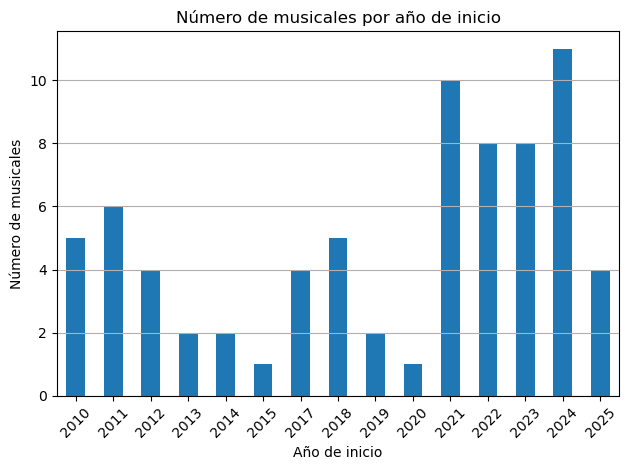

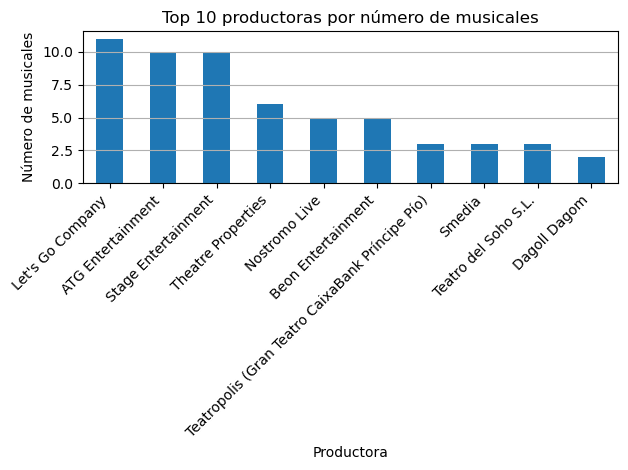

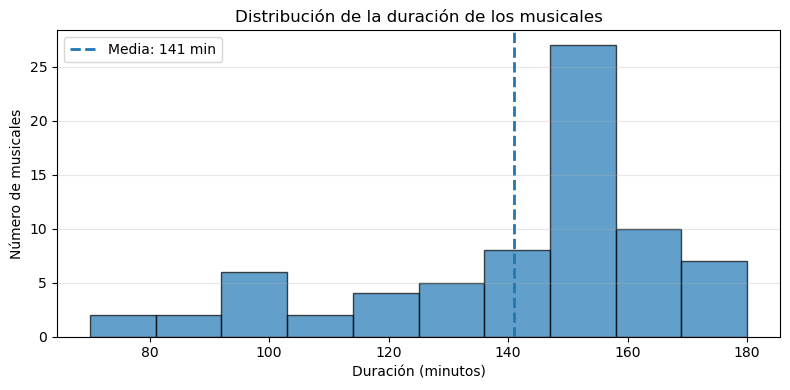

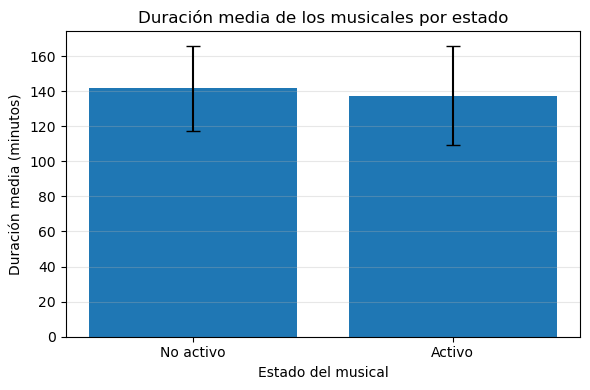

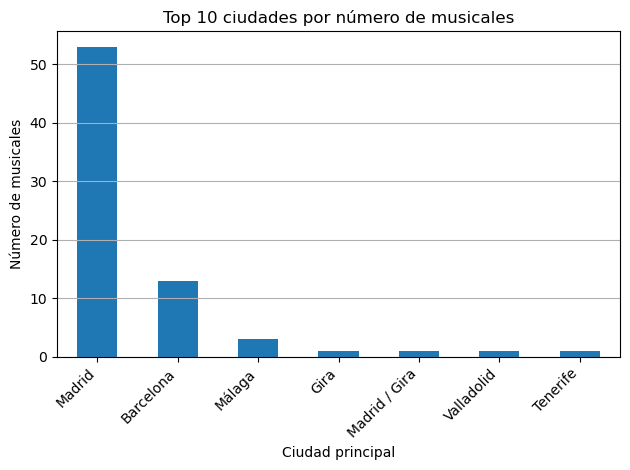

In [3]:


# =========================
# 1. Carga de datos
# =========================
df = pd.read_csv("maestro_musicales.csv")



# =========================
# 2. Vista rápida del dataset
# =========================
print("Shape (filas, columnas):", df.shape)
print("\nInfo:")
df.info()

print("\nPrimeras filas:")
display(df.head())

# =========================
# 3. Limpieza ligera para el EDA
# =========================

# Normalizar columna activa a booleano
if df["activa"].dtype == "object":
    df["activa"] = (
        df["activa"]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({"true": True, "false": False})
    )

# Asegurar que años son enteros (si no tienes NaN)
for col in ["anio_inicio", "anio_fin"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")

# Duración a numérico
df["duracion"] = pd.to_numeric(df["duracion"], errors="coerce")

# =========================
# 4. Nulos y duplicados
# =========================
print("\nNulos por columna:")
print(df.isna().sum())

print("\nDuplicados por clave (obra + productora + anio_inicio + anio_fin):")
if {"obra","productora","anio_inicio","anio_fin"}.issubset(df.columns):
    dups = df.duplicated(subset=["obra","productora","anio_inicio","anio_fin"]).sum()
    print("Duplicados:", dups)
else:
    print("No están todas las columnas para esta clave compuesta.")

# =========================
# 5. Descriptivos básicos
# =========================
print("\nDescriptivos numéricos:")
display(df[["anio_inicio","anio_fin","duracion"]].describe())

print("\nTop productoras por nº de musicales:")
display(
    df["productora"]
    .value_counts()
    .head(10)
    .rename("num_musicales")
)

print("\nReparto activos / no activos:")
print(df["activa"].value_counts(dropna=False))

# =========================
# 6. Gráficos básicos
# =========================

# 6.1 Nº de musicales por año de inicio
if "anio_inicio" in df.columns:
    plt.figure()
    df["anio_inicio"].value_counts().sort_index().plot(kind="bar")
    plt.title("Número de musicales por año de inicio")
    plt.xlabel("Año de inicio")
    plt.ylabel("Número de musicales")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

# 6.2 Top 10 productoras por número de musicales
plt.figure()
df["productora"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 productoras por número de musicales")
plt.xlabel("Productora")
plt.ylabel("Número de musicales")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# 6.3 Distribución de duración (histograma)
plt.figure(figsize=(8, 4))
plt.hist(df["duracion"], bins=10, edgecolor="black", alpha=0.7)
plt.axvline(df["duracion"].mean(), linestyle="--", linewidth=2,
            label=f"Media: {df['duracion'].mean():.0f} min")
plt.title("Distribución de la duración de los musicales")
plt.xlabel("Duración (minutos)")
plt.ylabel("Número de musicales")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


# 6.4 Boxplot de duración por estado (activo / no activo)
duracion_estados = df.groupby("activa")["duracion"].agg(["mean", "std"])

x = range(len(duracion_estados))
plt.figure(figsize=(6, 4))
plt.bar(x, duracion_estados["mean"], yerr=duracion_estados["std"],
        capsize=5)
plt.xticks(x, ["No activo", "Activo"])
plt.title("Duración media de los musicales por estado")
plt.xlabel("Estado del musical")
plt.ylabel("Duración media (minutos)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


# 6.5 Nº de musicales por ciudad principal (Top 10)
if "ciudad_principal" in df.columns:
    plt.figure()
    df["ciudad_principal"].value_counts().head(10).plot(kind="bar")
    plt.title("Top 10 ciudades por número de musicales")
    plt.xlabel("Ciudad principal")
    plt.ylabel("Número de musicales")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()


Conclusiones y hallazgos del análisis

El análisis del dataset maestro de musicales estrenados en España entre 2011 y 2025 revela varios patrones estructurales que caracterizan el comportamiento del sector y su evolución reciente.

1. Crecimiento sostenido en el número de musicales estrenados
La serie temporal confirma una tendencia ascendente en la producción de musicales, con un incremento notable a partir de 2021 y picos significativos en 2023 y 2024. Este comportamiento refleja una recuperación robusta del sector tras la pandemia y una consolidación creciente de la oferta.

2. Alta concentración del mercado en pocas productoras
El liderazgo lo ejercen principalmente Let’s Go Company, ATG Entertainment y Stage Entertainment, que acumulan la mayor parte de los estrenos del periodo. El sector funciona como un ecosistema concentrado donde un grupo reducido de compañías marca el ritmo de producción y define la agenda creativa.

3. Madrid como núcleo absoluto de la actividad musical
Con más de 50 musicales registrados, Madrid se posiciona como el centro neurálgico del teatro musical en España, seguido por Barcelona a mucha distancia. El resto de ciudades presentan actividad residual, lo que confirma una fuerte centralización geográfica.

4. Estandarización en la duración de los espectáculos
Los musicales presentan una duración media en torno a los 140 minutos, con una distribución estable situada mayoritariamente entre los 130 y 160 minutos. Este patrón sugiere un estándar de formato consolidado dentro de la industria.

5. Estado activo vs no activo: sin diferencias relevantes en duración
El análisis comparativo muestra que la duración no se correlaciona con el hecho de que un musical siga en cartel o no. Ambos grupos presentan rangos y valores medios similares, por lo que la duración no emerge como un factor determinante en la permanencia de un espectáculo.

6. Dataset depurado, homogéneo y estructurado para análisis avanzado
Tras el proceso de limpieza, se eliminaron duplicados, se homogenizaron productoras y denominaciones, y se corrigieron inconsistencias tipográficas y de formato. El resultado es un dataset sólido, fiable y plenamente preparado para análisis descriptivos, comparativos o modelos predictivos posteriores.